### Task 3 - IRIS FLOWER CLASSIFICATION

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [31]:
# import dataset
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
34,4.9,3.1,1.5,0.1,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
121,5.6,2.8,4.9,2.0,Iris-virginica
71,6.1,2.8,4.0,1.3,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa


There are three species available namely Iris - virginica, setosa, versicolor

In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [35]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [36]:
df.shape

(150, 5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Preprocessing

In [38]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Exploratory Data Analysis

<Axes: >

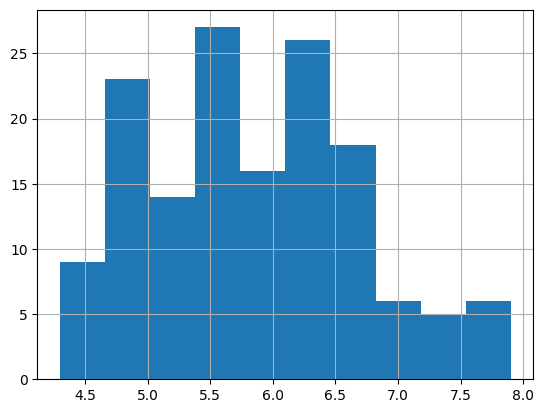

In [39]:
df['sepal_length'].hist()

<Axes: >

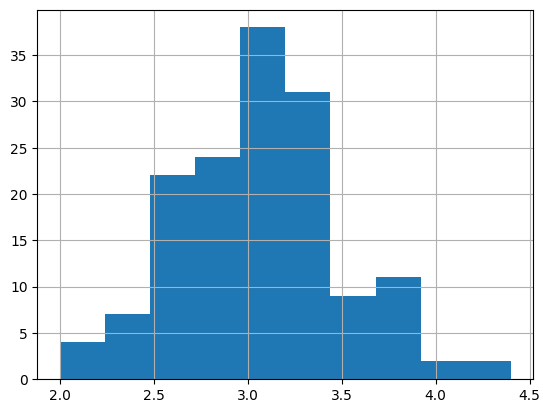

In [40]:
df['sepal_width'].hist()

<Axes: >

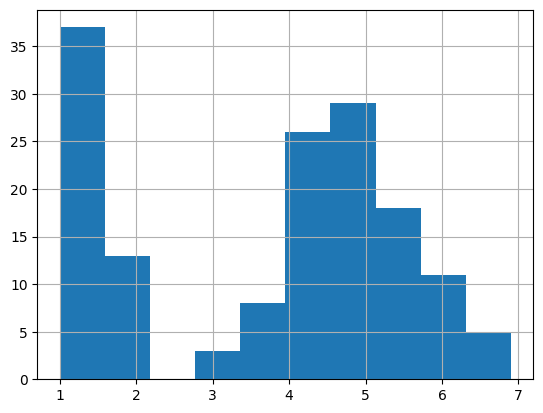

In [41]:
df['petal_length'].hist()

<Axes: >

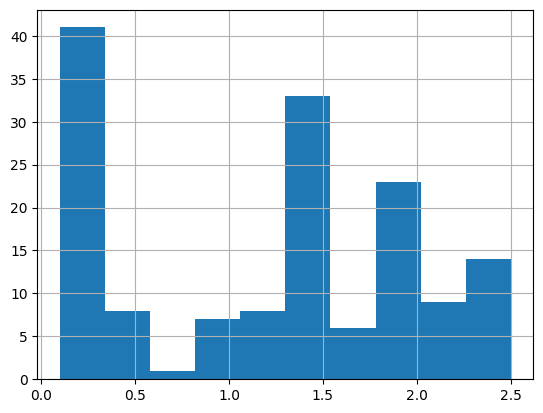

In [42]:
df['petal_width'].hist()

Since sepal length and sepal width shows bell shaped curve, it forms normal distribution,
Whereas petal length and petal width shows two separate bells, due to measurement of different species.
### creating scatter plots for inference

In [43]:
# create list of colors for species
colors = ['red', 'blue', 'green']
species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

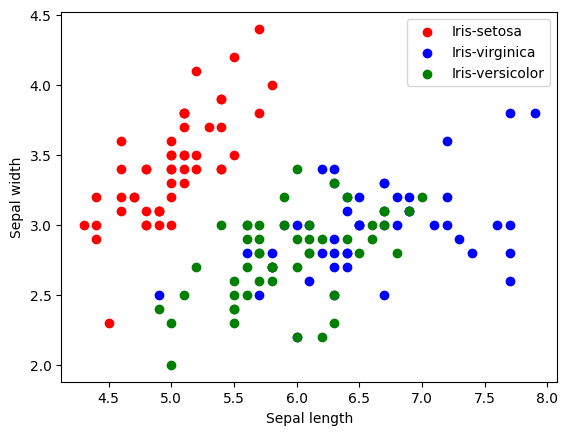

In [44]:
for i in range(3):

    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c= colors[i], label = species[i])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

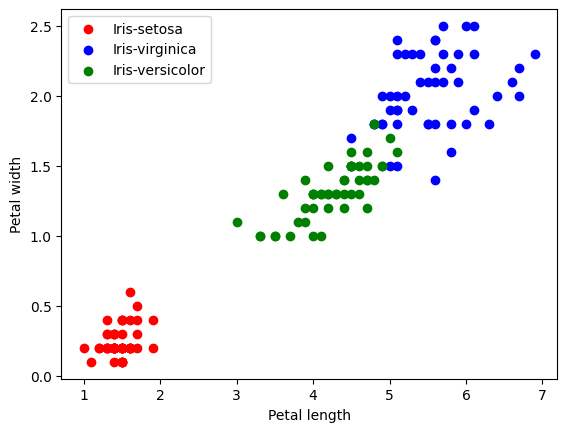

In [45]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c= colors[i], label = species[i])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

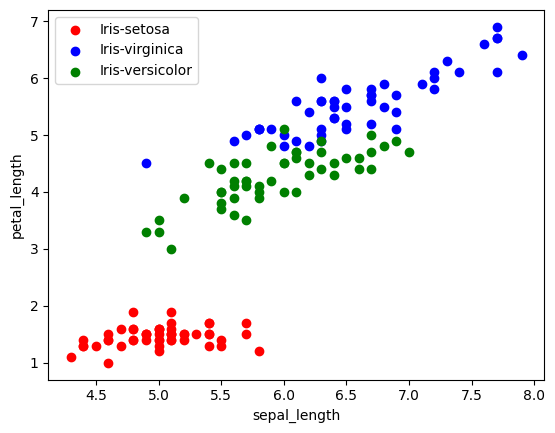

In [46]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

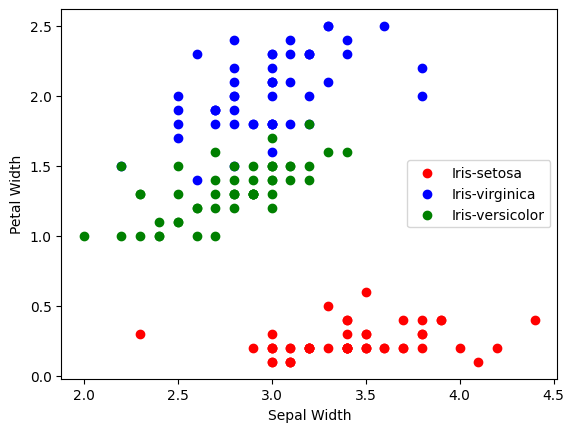

In [47]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

        

In [48]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


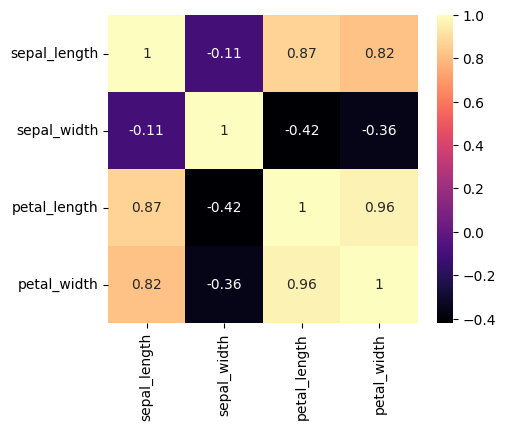

In [49]:
from matplotlib.pyplot import Axes


corr = corr_matrix
fig, axis = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=axis, cmap='magma')
plt.show()


- Petal length and petal width have high positive correlation of 0.96
- If petal length value increases, petal width also increases
- Sepal length have high positive correlation with petal length and petal width
- Sepal width have negative correlation with petal length and petal width

Since there are three species, machine can't read the word format, we should convert it to number using labelencoder which can convert it to machine readable form.

## Label Encoder

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#transform the species column to integer

df['species'] = le.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
125,7.2,3.2,6.0,1.8,2
48,5.3,3.7,1.5,0.2,0
128,6.4,2.8,5.6,2.1,2
45,4.8,3.0,1.4,0.3,0
34,4.9,3.1,1.5,0.1,0


## Model training and testing

In [72]:
from sklearn.model_selection import train_test_split

# from the available data we need an output i.e, y to train, so we need to drop species which is the predictable one
X = df.drop(columns=['species']) #input data

y = df['species'] #output data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [73]:
# train using Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)

lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [74]:
lr_model.score(X_test,y_test) * 100

97.77777777777777

In [75]:
# train using k nearest neighbours

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
knn_model.score(X_test, y_test) * 100

100.0

In [77]:
# train using decision tree

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
dt_model.score(X_test, y_test) * 100

91.11111111111111

I have got around 100% accuracy for KNN with our test data split, but we can also try various machine learning algorithms for this train test split.

In this iris classification project , I have learnt on how to train machine learning classification model for iris flower dataset. 


